In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont

In [2]:
df = pd.read_csv("./datasets/libras_minds_dataset_openpose_augmented.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face,person
0,0,hello,hello_0.avi,0,0.656550,0.932395,0.025427,0.654852,0.936922,0.018061,...,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,False,False,0
1,1,hello,hello_0.avi,1,0.654789,0.870996,0.124683,0.676395,0.889949,0.042268,...,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,False,False,0
2,2,hello,hello_0.avi,2,0.701695,0.784901,0.017858,0.668885,0.802914,0.018611,...,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,False,False,0
3,3,hello,hello_0.avi,3,0.703596,0.738675,0.033277,0.704249,0.617640,0.028435,...,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,False,False,0
4,4,hello,hello_0.avi,4,0.722398,0.629388,0.055209,0.721750,0.602609,0.019473,...,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58495,20755,you,augmented3-you_23.avi,25,0.092772,-0.067860,0.000000,0.092772,-0.067860,0.000000,...,0.0,0.092772,-0.06786,0.0,0.092772,-0.06786,0.0,False,False,1
58496,20756,you,augmented3-you_23.avi,26,0.092772,-0.067860,0.000000,0.092772,-0.067860,0.000000,...,0.0,0.092772,-0.06786,0.0,0.092772,-0.06786,0.0,False,False,1
58497,20757,you,augmented3-you_23.avi,27,0.092772,-0.067860,0.000000,0.092772,-0.067860,0.000000,...,0.0,0.092772,-0.06786,0.0,0.092772,-0.06786,0.0,False,False,1
58498,20758,you,augmented3-you_23.avi,28,0.523126,1.017326,0.030727,0.508542,1.014890,0.021320,...,0.0,0.092772,-0.06786,0.0,0.092772,-0.06786,0.0,False,False,1


In [4]:
hands = [i  for i in df.columns if i.startswith("hand_") and not i.endswith("_z")]
pose = [i  for i in df.columns if i.startswith("pose_") and not i.endswith("_z")]
face = [i  for i in df.columns if i.startswith("face_") and not i.endswith("_z")]

In [5]:
frame = df.iloc[20]

In [6]:
frame

Unnamed: 0               20
category              hello
video_name      hello_0.avi
frame                    20
hand_0_0_x         0.805171
                   ...     
pose_24_y               0.0
pose_24_z               0.0
missing_hand          False
missing_face          False
person                    0
Name: 20, Length: 418, dtype: object

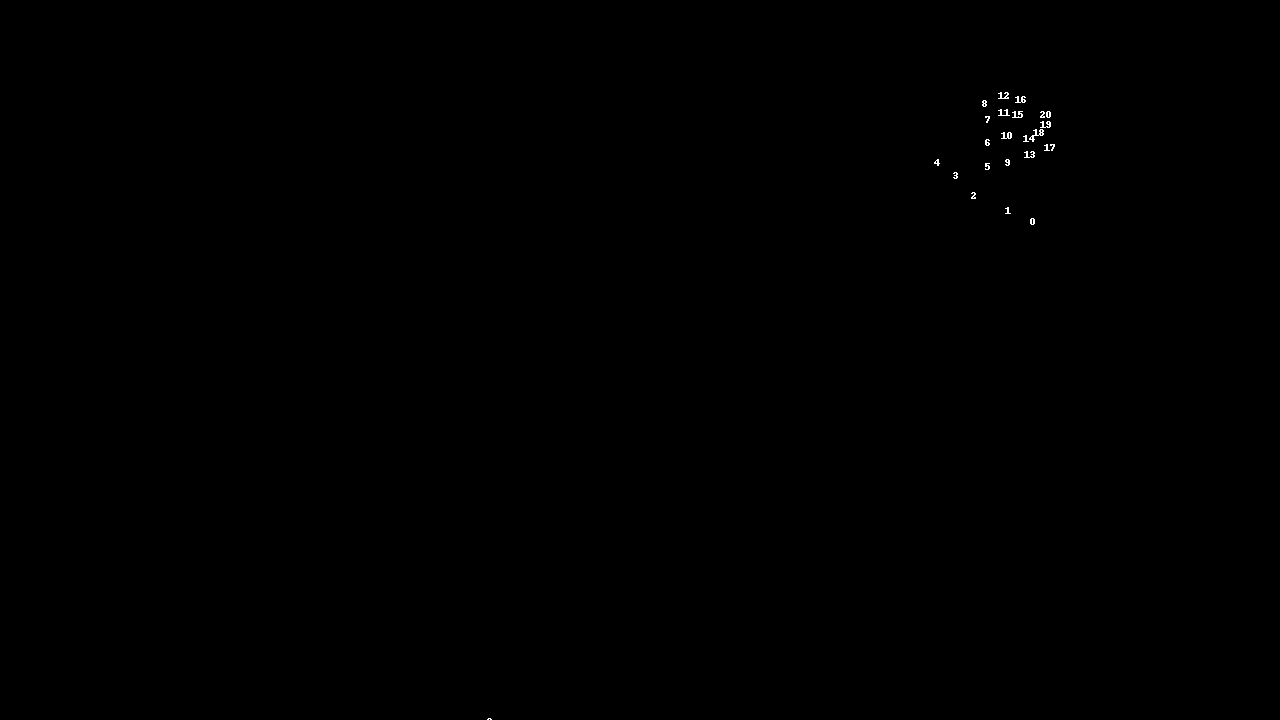

In [8]:
# Hand
image = Image.new("RGB", (1280, 720))
draw = ImageDraw.Draw(image)
for hand in range(21):
    x = frame[f"hand_0_{hand}_x"] * 1280
    y = frame[f"hand_0_{hand}_y"] * 720
    draw.text((x, y), str(hand), (255,255,255))
for hand in range(21):
    x = frame[f"hand_1_{hand}_x"] * 1280
    y = frame[f"hand_1_{hand}_y"] * 720
    draw.text((x, y), str(hand), (255,255,255))
image

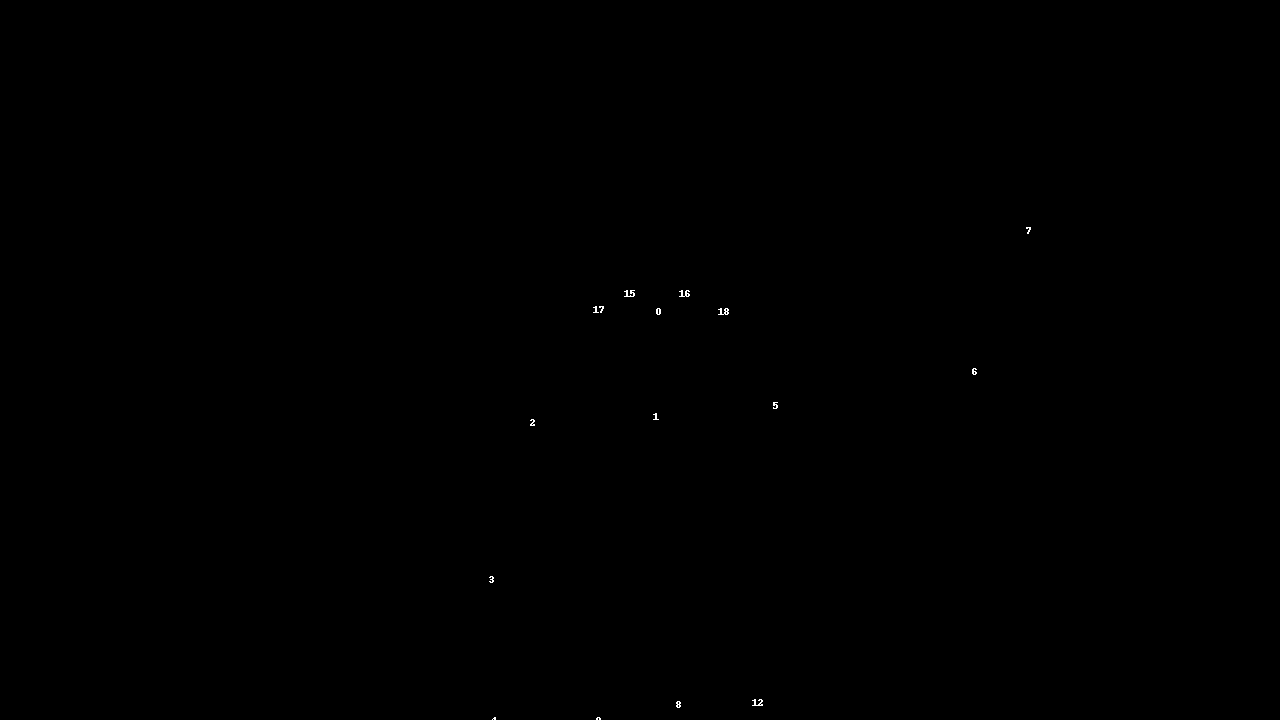

In [59]:
# Pose
image = Image.new("RGB", (1280, 720))
draw = ImageDraw.Draw(image)
for i in range(25):
    x = frame[f"pose_{i}_x"] * 1280
    y = frame[f"pose_{i}_y"] * 720
    if x > 0 and y > 0:
        draw.text((x, y), str(i), (255,255,255))
image

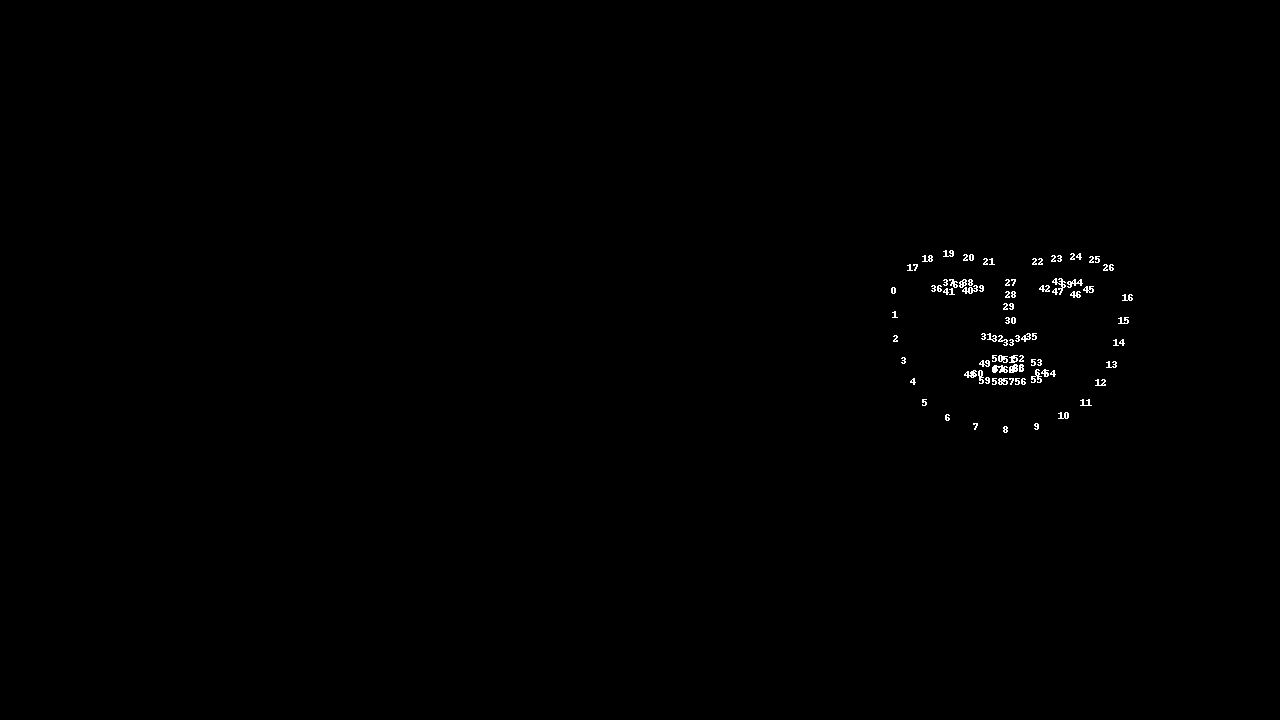

In [58]:
# Face
image = Image.new("RGB", (1280, 720))
draw = ImageDraw.Draw(image)
for i in range(70):
    x = frame[f"face_{i}_x"] * 1280 * 2 - 300
    y = frame[f"face_{i}_y"] * 720 * 2 - 300
    if x > 0 and y > 0:
        draw.text((x, y), str(i), (255,255,255))
image

# Body marks

Hand base: 2 or 5

Pose: 0 or 1

Face: 30 or 33